In [ ]:
import os
ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/oneNeuronDemoDir"
os.chdir(ROOT)

In [ ]:
os.listdir()

['ANN_demo.ipynb']

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
tf.keras.__version__

'2.7.0'

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple classifier using keras's Sequential API

### Dataset MNIST

* Its a dataset of handwritten digits
* each data point it 2d array of 28x28
* It has 10 classes 0-9
* aka hello world for ANN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [ ]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

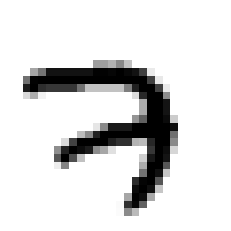

7

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

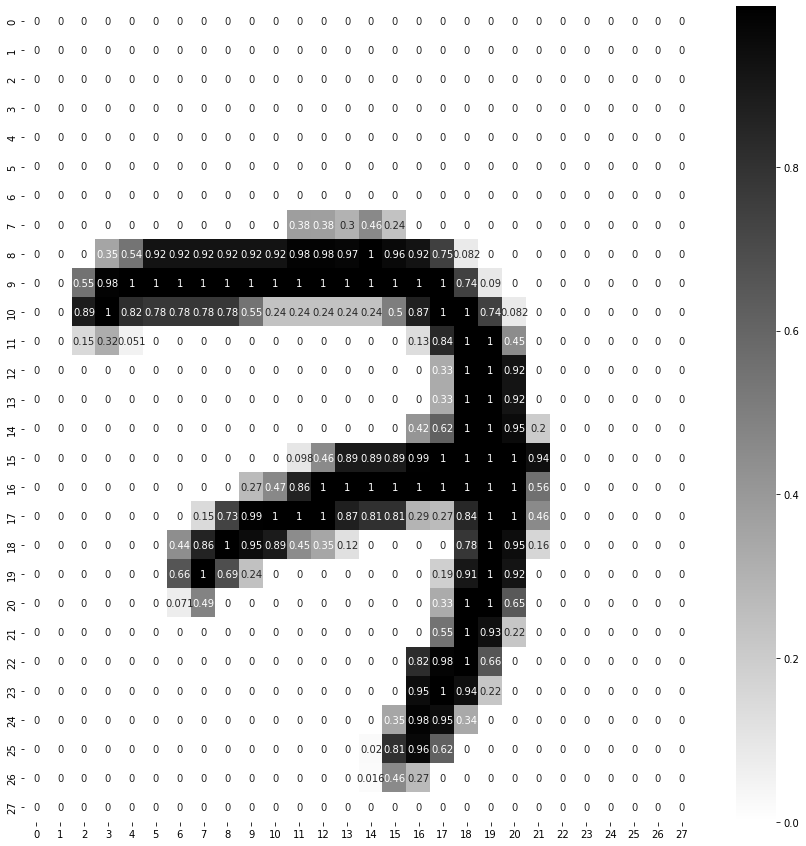

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10

(235500, 30100, 1010)

In [ ]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10])

266610

In [ ]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [ ]:
hidden1.get_weights()

[array([[ 0.0713958 , -0.06643119, -0.00286318, ..., -0.06056878,
         -0.04671936, -0.06437337],
        [-0.07408412,  0.04748693, -0.06212423, ...,  0.07149366,
          0.00803909,  0.05591227],
        [-0.06437252,  0.06711984,  0.05984493, ...,  0.03984972,
         -0.04051149, -0.07127802],
        ...,
        [-0.04176156,  0.06934047,  0.0592209 , ...,  0.03020895,
         -0.02263891, -0.00389216],
        [ 0.03571268,  0.02632817,  0.0425036 , ...,  0.0603869 ,
          0.04383806,  0.05621497],
        [ 0.05404985,  0.01589576,  0.0226332 , ..., -0.04622   ,
         -0.00196234, -0.03556149]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

$loss\_function(actual, pred) = error$

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Important -

* **Epochs**: Integer. 
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

* **batch_size**: Integer or None. 
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32. 
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None. 

    Number of samples per validation batch. 
    
    If unspecified, will default to batch_size. 
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [ ]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1125 - accuracy: 0.9687 - val_loss: 0.1147 - val_accuracy: 0.9660
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1030 - accuracy: 0.9709 - val_loss: 0.1086 - val_accuracy: 0.9696
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0942 - accuracy: 0.9739 - val_loss: 0.1014 - val_accuracy: 0.9702
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0873 - accuracy: 0.9754 - val_loss: 0.0985 - val_accuracy: 0.9694
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0809 - accuracy: 0.9774 - val_loss: 0.0956 - val_accuracy: 0.9718
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9790 - val_loss: 0.0906 - val_accuracy: 0.9710
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0706 - accuracy: 0.9800 - val_loss: 0.0855 - val_accuracy:

In [ ]:
55000 / 16

3437.5

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0678 - accuracy: 0.9793


[0.06781463325023651, 0.9793000221252441]

In [ ]:
model.save("model.h5")

In [ ]:
loaded_model = tf.keras.models.load_model("model.h5")

In [ ]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0678 - accuracy: 0.9793


[0.06781463325023651, 0.9793000221252441]

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.112470,0.968673,0.114661,0.9660
1,0.102964,0.970927,0.108590,0.9696
2,0.094179,0.973855,0.101407,0.9702
3,0.087291,0.975400,0.098549,0.9694
4,0.080943,0.977418,0.095600,0.9718
5,0.075403,0.979018,0.090606,0.9710
6,0.070626,0.980036,0.085550,0.9728
7,0.065635,0.981582,0.086286,0.9724
8,0.061563,0.982964,0.083461,0.9744
9,0.057636,0.983982,0.080724,0.9750


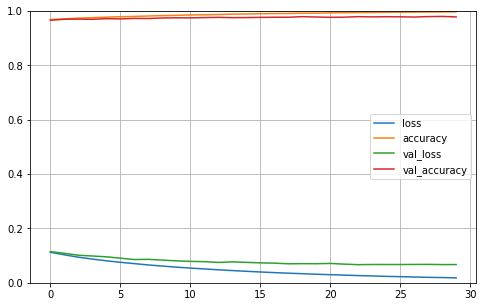

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

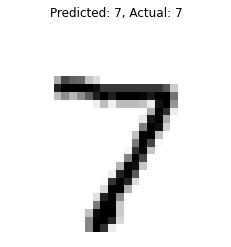

------------------------------------------------------------


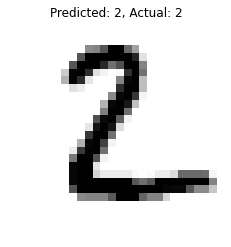

------------------------------------------------------------


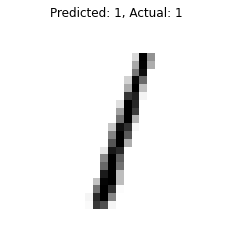

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)